# Setting Up
Accessing packages required and the dataset. 

Scenario: 
- I want to predict used car prices based on features provided.
- The features are: Brand, Body, Mileage, Engine Volume, Engine Type, Registration Status, Year of Production, and Model. 

To do this, I will run a ML MR model using training-testing data splitting (80-20 split). 

Data may be incomplete, so data cleaning will take place too. There is a lot of categorical data, so it will have to be dummy coded. I will run a thorough feature importance modelling, scale the variables, and assess the model.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #Filtering out some Seaborn future warnings for privacy reasons

In [2]:
raw_data = pd.read_csv('used_car_prices_data.csv')

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing data

### Exploring the descriptives

In [5]:
raw_data.describe(include='all') #include='all' will ensure that even categorical features are included

#note that the "count" for each features is not the same - there are missing values that should be cleaned 
#the dataset is large enough to do listwise deletion rather than imputation
#note that there are 312 unique model variables, which likely don't explain much in the price, but would cause dummy coding headache
#model feature information is likely captured through brand, body, and engine vol. so it's good to drop. 
#note that over 90% of the registration variable is yes - likely a useless variable for inclusion

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
raw_data1 = raw_data.drop(['Model'], axis=1) #dropping the "model" feature for reason listed above
# axis 1 denotes that a column is being dropped

In [7]:
raw_data1.describe(include='all') #notice missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
raw_data1.isnull().sum() #to show how many missing values are in each feature

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_mv_drop = raw_data1.dropna(axis=0) #axis 0 denotes row delection (i.e., observation) this is list-wise deletion

In [10]:
data_mv_drop.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Visualising Data Distributions & Cleaning Data
Ensure that we have a normal distribution for our features and output

### Price

<Axes: xlabel='Price', ylabel='Count'>

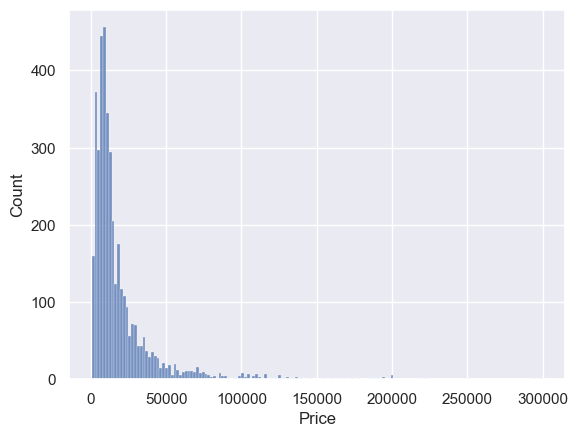

In [11]:
sns.histplot(data_mv_drop['Price'])

### Mileage

<Axes: xlabel='Mileage', ylabel='Count'>

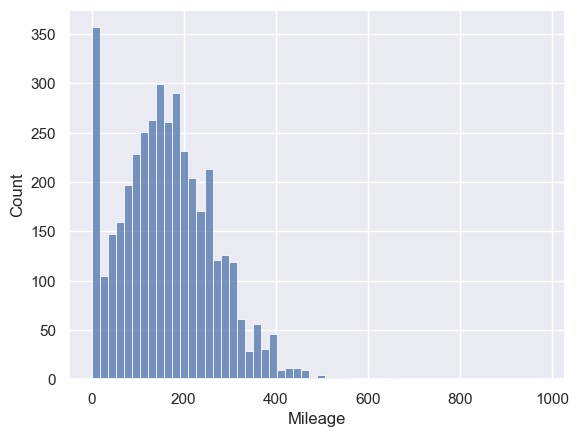

In [12]:
sns.histplot(data_mv_drop['Mileage'])

### Engine Volume

<Axes: xlabel='EngineV', ylabel='Count'>

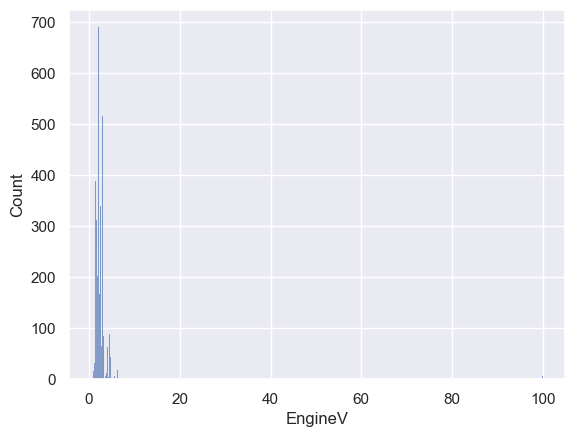

In [13]:
sns.histplot(data_mv_drop['EngineV'])

### Year

<Axes: xlabel='Year', ylabel='Count'>

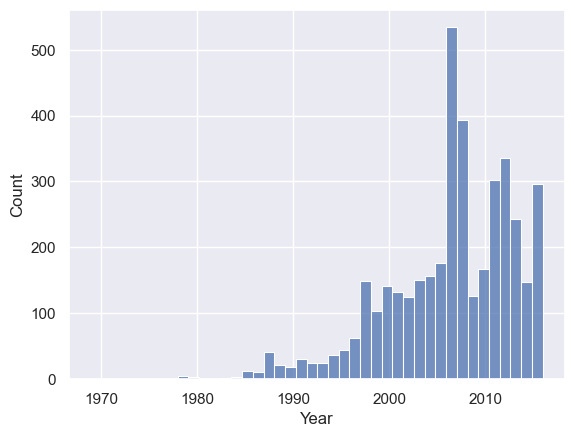

In [14]:
sns.histplot(data_mv_drop['Year'])

Issues:
- Observing the data along with the descriptives show that the data are not normally distributed, with a strong positive skew in Price. 
- Secondly, there is a strong incidence of outliers, in both Mileage, Volume, Price, and Year. Volume especially, with a manual observation of the csv, shows that there may be incorrect data inputs (99?, 75?, 66?). Research tells me that normal car engine volumes fall between 0.6 and 6.5.

Solution:
- I will delete the outliers above the 99% percentile in Price and Mileage. Delete values above 6.5 for engineV. And then delete the lower 0.01 quantile of Year to erase the vintage cars from our dataset.
- Transform the data to be normally distributed. Given the strong skew, a log transformation will be attempted on Price. This will be done in the next section, but is noted here. 

### Dealing with outliers - Price

In [15]:
q = data_mv_drop['Price'].quantile(0.99) #delete prices above the 99 percentile (approx 130,000), reducing outliers
data1 = data_mv_drop[data_mv_drop['Price']<q]
data1.describe(include='all') #note the better distribution of the price output variable now

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

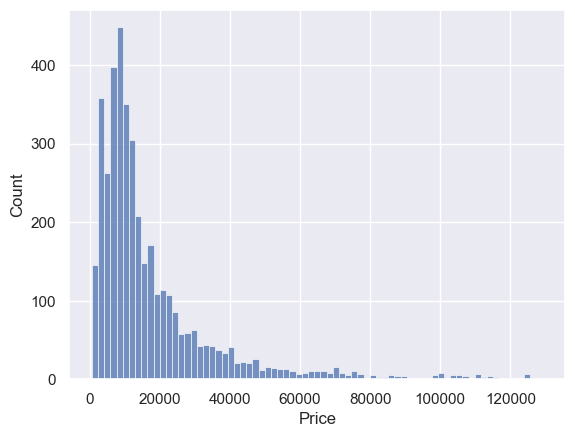

In [16]:
sns.histplot(data1['Price'])

### Dealing with outliers - Mileage

In [17]:
q = data1['Mileage'].quantile(0.99) #delete mileage above the 99 percentile, reducing outliers
data2 = data1[data1['Mileage']<q]

In [18]:
data2.describe(include='all') #note the better distribution of the mileage output variable now

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Mileage', ylabel='Count'>

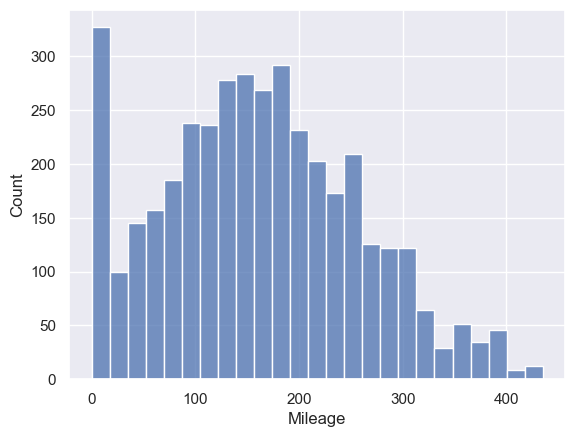

In [19]:
sns.histplot(data2['Mileage']) #much better now

### Dealing with Outliers - Engine Volume

In [20]:
data3 = data2[data2['EngineV']<6.5] #delete all volumes above 6.5 - as per research earlier
data3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='EngineV', ylabel='Count'>

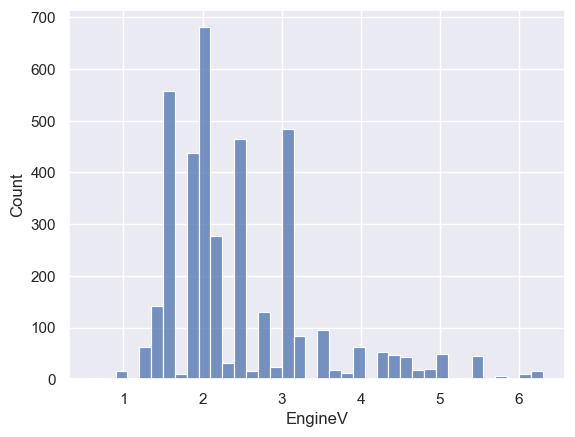

In [21]:
sns.histplot(data3['EngineV'])

### Dealing with outliers - Year

In [22]:
q = data3['Year'].quantile(0.01) #delete mileage above the 99 percentile, reducing outliers
data4 = data3[data3['Year']>q]
data4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='Year', ylabel='Count'>

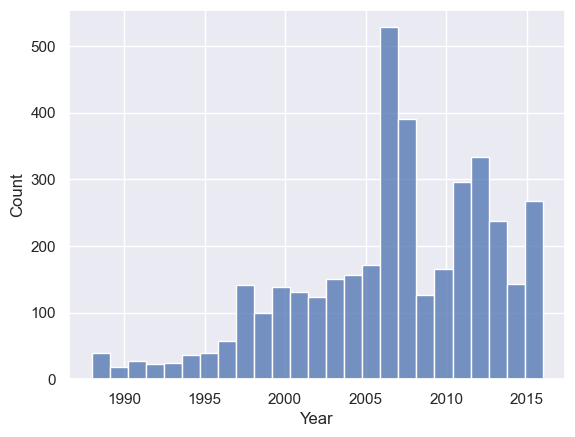

In [23]:
sns.histplot(data4['Year'])

#### Compiling the now cleaned data

In [24]:
data_clean = data4.reset_index(drop=True)

In [25]:
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking & Fixing Regression Assumptions

### Linearity & Homoscedasticity

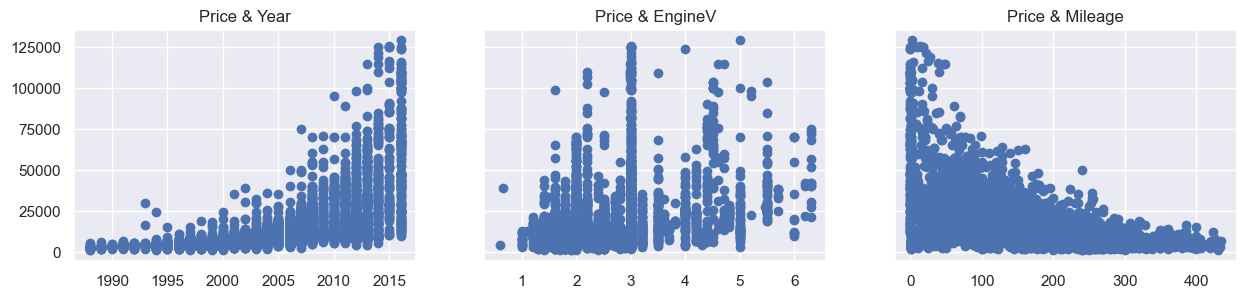

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_clean['Year'],data_clean['Price'])
ax1.set_title('Price & Year')
ax2.scatter(data_clean['EngineV'],data_clean['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['Price'])
ax3.set_title('Price & Mileage')

plt.show()

Due to the skew in the price data, noted in the previous section, it is affecting the linearity of our data. 
As noted earlier, this will be fixed via a log transformation and checked again.

In [27]:
log_price = np.log(data_clean['Price']) #log transformation for price data, as discussed earlier
data_clean['log_price'] = log_price
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


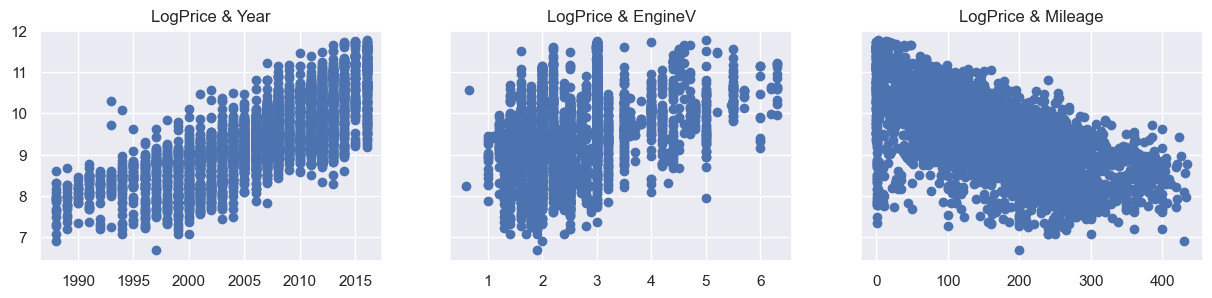

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_clean['Year'],data_clean['log_price'])
ax1.set_title('LogPrice & Year')
ax2.scatter(data_clean['EngineV'],data_clean['log_price'])
ax2.set_title('LogPrice & EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['log_price'])
ax3.set_title('LogPrice & Mileage')

plt.show()

In [29]:
data_clean = data_clean.drop(['Price'],axis=1) #I will drop the original price variable now, keeping log_price

### Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['Mileage','Year','EngineV']] #checking features that make sense, our categorical won't have this issue
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


General acceptable standards:
- VIF < 3 is great
- VIF > 10 should be removed
- All scores between 3 - 10 need to be evaluated on a case by case basis
Source: https://quantifyinghealth.com/vif-threshold/ 

It seems like Year is overly correlated with our existing data. As noted earlier, there was a good chance that year and mileage would be correlated (the older the car, the more mileage). EngineV seems okay, although if very conservative, could be removed. However, this doesn't make a lot of logical sense. Mileage is a key factor that buyers and sellers look into when purchasing a car - so it makess sense to include it, even if the variance inflation feature is in the concerning range. 

In [31]:
data_nomc = data_clean.drop(['Year'],axis=1) #I'll remove year from the dataset to make it cleaner

# Creating Dummy Variables for Categorical Features

In [32]:
data_dummy = pd.get_dummies(data_nomc, drop_first=True) #drop first to ensure N-1 groups are made for our dummy variables
data_dummy

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [33]:
data_dummy = data_dummy.astype(float) #this converts the boolean "True/False" into 1/0 and also preserves the rest of the values
data_dummy

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163.0,2.5,9.350102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35.0,1.6,9.792556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9.0,3.0,11.736069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1.0,3.5,8.779557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


### Check Multicolinearity for the Dummy Features and Existing Features

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_dummy[['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


Note: 
- EngineV VIF drops when we check for all our variables now. This is probably because engine volume is distributed among the various brands and car sizes, which increases the nuance of our data.
- All the dummy variables are in the great range, as anticipated. This is standard for categorical data.
- Mileage slightly increased. Likely  as certain brands/body/engine volumes are driven further than others. Given this is used car sales data.
- High registration VIF is likely because it could be explained by another feature. However, it makes sense to keep it.

## Rearranging the Data
So we can have the output listed first, with features listed after. For easier model fitting later on.

In [35]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'] #log price first everything else remains the same order

In [37]:
data_final = data_dummy[cols]
data_final

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163.0,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,9.792556,35.0,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,11.736069,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,8.779557,1.0,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# Splitting Data for Training and Testing the Model

In [38]:
from sklearn.model_selection import train_test_split #import the splitting package
x = data_final.drop('log_price', axis=1) #takes all the features minus the target
y = data_final['log_price'] #this is our target variable

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=69) 
#test size split is 20%, random state 69 locks the seeding of the splitted variables so it doesn't change throughout the model

In [39]:
x_train.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1237,70.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3403,231.0,1.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2361,238.0,1.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1541,127.0,1.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3313,168.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
x_test.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1423,95.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2160,20.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1683,120.0,3.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
944,220.0,1.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1232,95.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [41]:
y_train.head()

1237    9.781320
3403    9.210340
2361    8.293800
1541    9.457200
3313    9.769956
Name: log_price, dtype: float64

In [42]:
y_test.head()

1423     9.740969
2160    10.085809
1683    10.707729
944      9.190138
1232     9.137770
Name: log_price, dtype: float64

The split was successful. All the row numbers are the same. First row for train is 1237 between X and Y. First row for test is 1423 for X and Y.

# Unscaled Regression
This is the first regression with all the variables. I will visually explore the data  too.

In [43]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
y_hat = reg.predict(x_train) #storing our results in y_hat, as per multiple regression equation

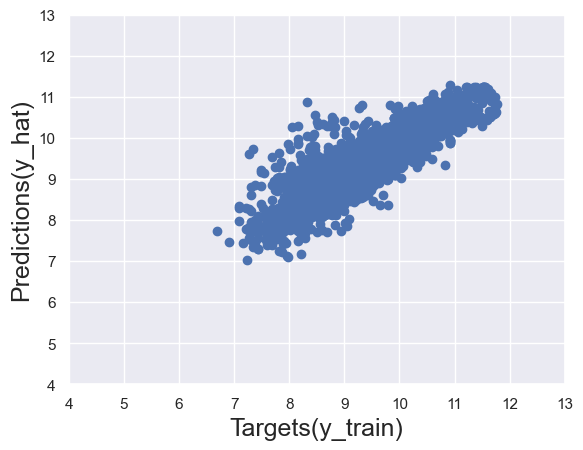

In [45]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(4,13)
plt.ylim(4,13)
plt.show()

Text(0.5, 1.0, 'Residuals')

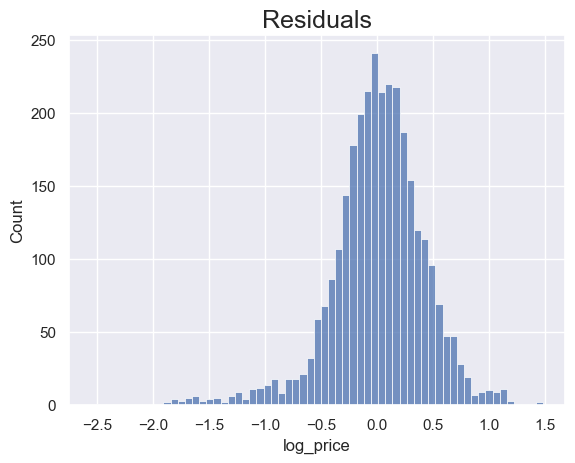

In [46]:
sns.histplot(y_train - y_hat)
plt.title("Residuals", size=18)

In [47]:
r2 = reg.score(x_train,y_train) #this is R-square
r2

0.7581320551527381

In [48]:
n = len(y_train)  # number of samples
p = x_train.shape[1]  # number of features used
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adj_r2 #print the adjusted R-squared

0.7567948990348833

In [49]:
reg.intercept_

9.30639649465833

In [50]:
reg.coef_

array([-0.00472825,  0.22591692,  0.02467334, -0.00336254, -0.50464583,
       -0.58803592, -0.18290649, -0.22799187, -0.5931784 , -0.34833994,
       -0.3938272 , -0.45235686, -0.46441764, -0.38486953, -0.1733526 ,
       -0.32999255,  1.10762129])

In [51]:
reg_summary = pd.DataFrame(x_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary #unstandardised weights for the model

,Features,Weights
0,Mileage,-0.004728
1,EngineV,0.225917
2,Brand_BMW,0.024673
3,Brand_Mercedes-Benz,-0.003363
4,Brand_Mitsubishi,-0.504646
5,Brand_Renault,-0.588036
6,Brand_Toyota,-0.182906
7,Brand_Volkswagen,-0.227992
8,Body_hatch,-0.593178
9,Body_other,-0.348340


Overall, the training model shows a good fit to the data both statistically and on visual inspection. There is good clustering of values across the 45 degree axis running through the data. This suggests that the model performs well. I'm going to dive deeper into the features and assess their contribution to the model, using a multitude of methods in the next section.

# Feature Importance Analysis
To see which features could be redundant. The methods used will be:

- F-regression
- Random Forest Analysis
- Permutation Analysis

These model outcomes will be triangulated with standardised results later.

## F-regression
A basic analysis showing the unstandardised weights of each feature when individually used to predict the target.

In [52]:
from sklearn.feature_selection import f_regression #relevant package

In [53]:
f_regression(x_train,y_train)

(array([1.86017300e+03, 6.64541708e+02, 2.41533127e+01, 4.20757358e+01,
        1.98963118e+01, 1.42780426e+02, 7.68670878e+01, 3.20569966e+01,
        7.17234251e+01, 1.39431924e+00, 4.68331098e+01, 1.12220252e+02,
        4.61481803e+01, 2.41373934e+01, 2.21570129e+00, 3.57285882e+00,
        8.53278565e+02]),
 array([1.39907533e-318, 6.66507790e-133, 9.35963643e-007, 1.01872574e-010,
        8.46727620e-006, 3.32490691e-032, 2.96198742e-018, 1.63428140e-008,
        3.77229737e-017, 2.37767888e-001, 9.28256378e-012, 8.79910796e-026,
        1.30985043e-011, 9.43672128e-007, 1.36714983e-001, 5.88245888e-002,
        7.39443448e-166]))

In [54]:
p_values = f_regression(x_train,y_train)[1]
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.238, 0.   , 0.   , 0.   , 0.   , 0.137, 0.059, 0.   ])

In [55]:
freg_summary = pd.DataFrame(data=x_train.columns.values, columns=['Feature'])
freg_summary ['p-values'] = p_values.round(3) #pulls the rounded p-values earlier and sorts them into our table
freg_summary ['Weights'] = reg.coef_ #pulls coefficients from earlier section the [0] helps resolve an issue with indexing the columns
freg_summary

,Feature,p-values,Weights
0,Mileage,0.000,-0.004728
1,EngineV,0.000,0.225917
2,Brand_BMW,0.000,0.024673
3,Brand_Mercedes-Benz,0.000,-0.003363
4,Brand_Mitsubishi,0.000,-0.504646
5,Brand_Renault,0.000,-0.588036
6,Brand_Toyota,0.000,-0.182906
7,Brand_Volkswagen,0.000,-0.227992
8,Body_hatch,0.000,-0.593178
9,Body_other,0.238,-0.348340


This is a good summary of how our unstandardised weights influence the model. But it doesn't tell us anything about their relative weighting. For this, I'll run more feature evaluation models.

##  Random Forest Feature Evaluation Model
This method combines multiple decision trees to make predictions from features to target, and ranks them based on their importance to the model. 

In [56]:
from sklearn.ensemble import RandomForestRegressor #package

In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
feature_importance = rf_model.feature_importances_
feature_importance

array([0.46661212, 0.26804887, 0.0098103 , 0.01596421, 0.0130183 ,
       0.01021594, 0.00831239, 0.00908337, 0.00708754, 0.00527461,
       0.02002831, 0.00598871, 0.00823386, 0.01204422, 0.00314254,
       0.01508129, 0.12205343])

In [58]:
forest_summary = pd.DataFrame(data=x_train.columns.values, columns=['Feature'])
forest_summary  ['Importance'] = feature_importance #pulls coefficients from earlier section the [0] helps resolve an issue with indexing the columns
forest_summary #results show similar patterns to the f-regression model

,Feature,Importance
0,Mileage,0.466612
1,EngineV,0.268049
2,Brand_BMW,0.009810
3,Brand_Mercedes-Benz,0.015964
4,Brand_Mitsubishi,0.013018
5,Brand_Renault,0.010216
6,Brand_Toyota,0.008312
7,Brand_Volkswagen,0.009083
8,Body_hatch,0.007088
9,Body_other,0.005275


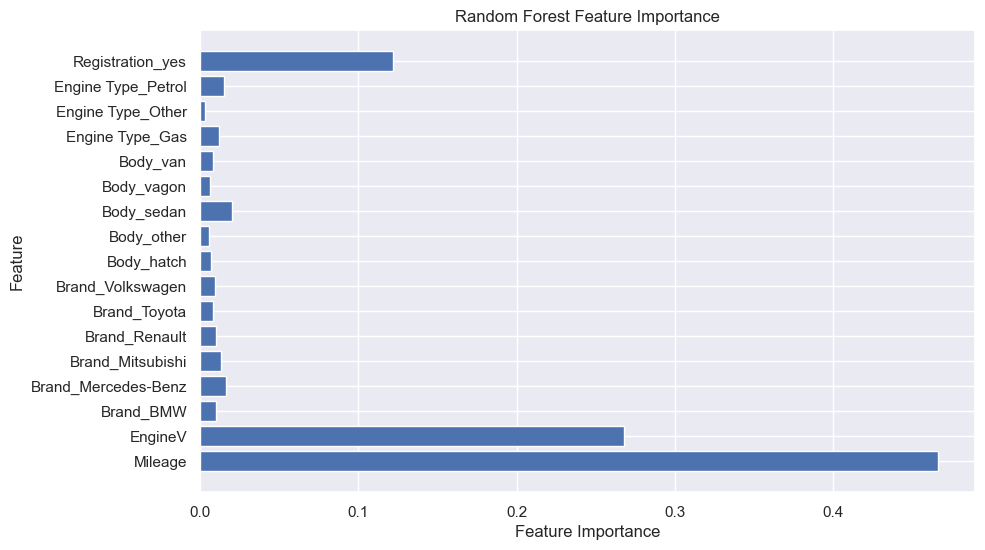

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), x_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

The Random Forest technique helps further contextualise the f-regression results, with more nuance. It shows the disproprotionately larger importance of the Engine Volume and Mileage features, while also further contextualising the cumulative feature weighting for the dummy coded categorical features.

## Permutation Importance
This model essentially shuffles the coefficient values for each feature, then evaluates them against the target. The biggest deviations for each model show which feature is more relatively important.

In [60]:
from sklearn.inspection import permutation_importance #package

In [61]:
perm_importance = permutation_importance(rf_model, x_train, y_train, n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean
feature_importances_std = perm_importance.importances_std

In [62]:
feature_importances

array([0.76488751, 0.56113217, 0.01720504, 0.03070924, 0.03062983,
       0.03412428, 0.01319996, 0.02234089, 0.01466611, 0.00729793,
       0.05416682, 0.00875176, 0.01701533, 0.03146901, 0.00327807,
       0.04745913, 0.25408049])

In [63]:
feature_importances_std

array([0.0237121 , 0.01475888, 0.00110353, 0.00156696, 0.00136546,
       0.003494  , 0.00087916, 0.00068967, 0.00154306, 0.00046499,
       0.00353788, 0.00048465, 0.00085228, 0.00183093, 0.00042705,
       0.00154512, 0.01010084])

In [64]:
perm_summary = pd.DataFrame(data=x_train.columns.values, columns=['Feature'])
perm_summary ['Importance'] = feature_importances #pulls averages of the permutation analysis
perm_summary ['StD'] = feature_importances_std #pulls standard deviations of the permuatation analysis
perm_summary

,Feature,Importance,StD
0,Mileage,0.764888,0.023712
1,EngineV,0.561132,0.014759
2,Brand_BMW,0.017205,0.001104
3,Brand_Mercedes-Benz,0.030709,0.001567
4,Brand_Mitsubishi,0.030630,0.001365
5,Brand_Renault,0.034124,0.003494
6,Brand_Toyota,0.013200,0.000879
7,Brand_Volkswagen,0.022341,0.000690
8,Body_hatch,0.014666,0.001543
9,Body_other,0.007298,0.000465


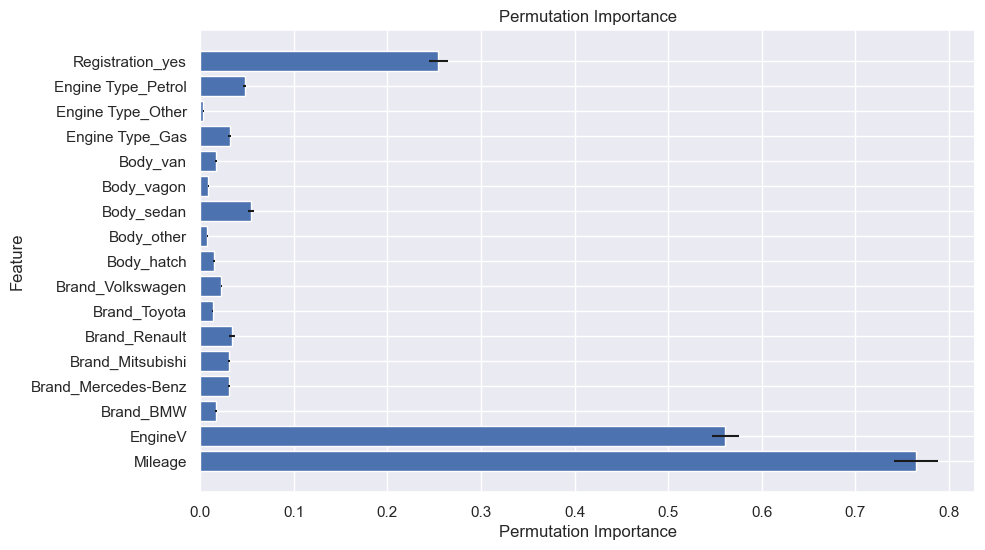

In [65]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, xerr=feature_importances_std, align='center')
plt.yticks(range(len(feature_importances)), x_train.columns)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.show()

The permutation importance analysis backs up the random forests model, and the bar graph is an almost an exact replica. This confirms the relative importance of our features. But it does little to suggest the directional influence of the variables on price. For this, standardisation will help triangulate. 

# Scaling / Standardisation
Note, with dummy variables included only the continuuous features will be standardised. i.e., Mileage and EngineV

In [66]:
from sklearn.preprocessing import StandardScaler #scaling package

In [67]:
non_dummy_vars = ['Mileage', 'EngineV']
x_train_non_dummy = x_train[non_dummy_vars]
x_test_non_dummy = x_test[non_dummy_vars] #separating the non-dummy coded variables in x_train and x_test

In [68]:
scaler = StandardScaler()
x_train_non_dummy_scaled = scaler.fit_transform(x_train_non_dummy)
x_test_non_dummy_scaled = scaler.transform(x_test_non_dummy) #scaling the non-dummy coded features

In [69]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[non_dummy_vars] = x_train_non_dummy_scaled
x_test_scaled[non_dummy_vars] = x_test_non_dummy_scaled

In [70]:
x_train_scaled.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1237,-0.953604,-0.478580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3403,0.737597,-0.582460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2361,0.811128,-0.686339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1541,-0.354856,-0.997977,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3313,0.075823,1.599006,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
x_test_scaled.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1423,-0.690995,-0.478580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2160,-1.478821,0.040816,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1683,-0.428386,1.079610,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
944,0.622049,-0.582460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1232,-0.690995,-0.478580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Everything is good here. Scaling was a success.

Note:
- x_test and x_train have our non-scaled features.
- x_test_scaled and x_train_scaled have the scaled features.

# Scaled Regression

In [89]:
reg_s = LinearRegression()
reg_s.fit(x_train_scaled,y_train)

LinearRegression()

In [73]:
y_hat_s = reg.predict(x_train_scaled) #_s denotes scaled regression results

In [74]:
reg_s.score(x_train_scaled,y_train)

0.7581320551527382

In [75]:
reg_s.intercept_

9.102095172837622

In [76]:
reg_s.coef_

array([-0.45012326,  0.21748014,  0.02467334, -0.00336254, -0.50464583,
       -0.58803592, -0.18290649, -0.22799187, -0.5931784 , -0.34833994,
       -0.3938272 , -0.45235686, -0.46441764, -0.38486953, -0.1733526 ,
       -0.32999255,  1.10762129])

In [77]:
reg_s_summary = pd.DataFrame(x_train_scaled.columns.values, columns=['Features'])
reg_s_summary['Weights'] = reg_s.coef_
reg_s_summary #unstandardised weights for the model

,Features,Weights
0,Mileage,-0.450123
1,EngineV,0.217480
2,Brand_BMW,0.024673
3,Brand_Mercedes-Benz,-0.003363
4,Brand_Mitsubishi,-0.504646
5,Brand_Renault,-0.588036
6,Brand_Toyota,-0.182906
7,Brand_Volkswagen,-0.227992
8,Body_hatch,-0.593178
9,Body_other,-0.348340


This helps futher contextualise the feature importance results from earlier. And helps us see the directional influence of these features on the target price. 

# Testing the Model

In [78]:
y_predicted = reg.predict(x_test) #going to use the non-scaled features in the testing for simplicity sake

<function matplotlib.pyplot.show(close=None, block=None)>

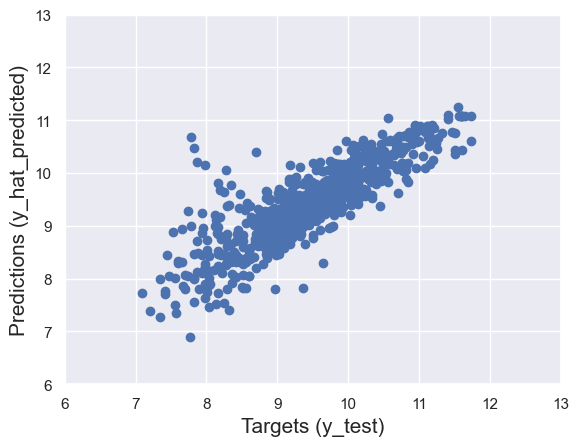

In [79]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Targets (y_test)', size =15)
plt.ylabel('Predictions (y_hat_predicted)', size =15)
plt.xlim (6, 13)
plt.ylim (6,13)
plt.show

## Results and Determining Model Suitability

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Mean Percentage Error

In [81]:
def mean_percentage_error(actual, predicted):
    return np.mean((actual - predicted) / actual) * 100
#this is manually calculated, I could not find a mean percentage error package in any packages

mpe = mean_percentage_error(y_test, y_predicted)
mpe # this score indicates that the model tends ot underestimate the target prices

-0.008694926249816458

#### Mean Absolute Percentage Error

In [82]:
def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100
#this is manually calculated, I could not find a mean absolute percentage error package in any packages

mape = mean_absolute_percentage_error(y_test, y_predicted)
mape #this score tells us that there's an average 3.61% deviation from the actual values

3.6085466743685854

#### Mean Absolute Error

In [83]:
mae = mean_absolute_error(y_test, y_predicted)
mae #score indicates the average intensity of errors, indicating the typical size of prediction errors

0.3329787791670797

#### Mean Squared Error

In [84]:
mse = mean_squared_error(y_test, y_predicted)
mse #score of the average of the squared differences between predicted and actual values
#it penalises larger errors due to squaring the differences

0.21614406122681348

#### Root Mean Squared Error

In [85]:
rmse = np.sqrt(mse)
rmse
#common metric to measure goodness of fit, with scores < 0.5 being great, 0.5 - 0.7 being acceptable, > 0.7 being bad. 

0.4649129609150658

#### R-squared

In [86]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_predicted)
r2_test

0.7213740194268152

#### Adj R-squared

In [87]:
n = len(y_test)  # number of samples
p = x_test.shape[1]  # number of features
adj_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
adj_r2_test

0.7151086203927621

## Results Summary Table

In [88]:
result_table = pd.DataFrame({
    'Metric': ['Mean Percentage Error (MPE)', 'Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)',
               'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'R-squared (R2)', 'Adjusted R-squared (Adj R2)'],
    'Value': [mpe, mae, mape, mse, rmse, r2_test, adj_r2_test]
})

result_table = pd.DataFrame(result_table)
result_table.round(3) #rounding to the 3rd decimal place for ease

,Metric,Value
0,Mean Percentage Error (MPE),-0.009
1,Mean Absolute Error (MAE),0.333
2,Mean Absolute Percentage Error (MAPE),3.609
3,Mean Squared Error (MSE),0.216
4,Root Mean Squared Error (RMSE),0.465
5,R-squared (R2),0.721
6,Adjusted R-squared (Adj R2),0.715


# Interpretation
Overall, this model predicts approximately 72% of the variance in a used car's price. This is a solid model in the moderate range of usefulness. Root Mean Squared Error (RMSE) also indicates the model shows a general accuracy. 

Notes: 
- RMSE and Mean Absolute Error (MAE) values indicate relatively small prediction errors. 
- Mean Absolute Percentage Error (MAPE) shows that the model's predictions tend to deviate by 3.61% overall for prices. 
- Mean Percengage Error (MPE) being negative shows that the model tends to *underestimate* prices of used cars based on our features. 

This could be problematic in a used car sales environment, where sellers would prefer to get the maximum value from customers. 






